In [1]:
#%matplotlib inline

# Section I. DIGIT DATASET
- Load the copy of the Digit dataset shipped with scikit-learn.

- Question 1. How many classes are there in the dataset? 
- Question 2. How many examples are available in each class ? 
- Question 3. How is the digit image described ?

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


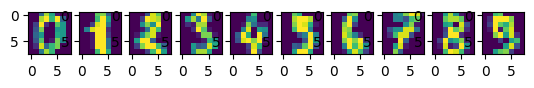

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [34]:
import scipy
import numpy as np
from sklearn.datasets import load_digits

# Load Iris dataset
digits = load_digits()

## print the label species(setosa, versicolor,virginica)
print(digits.target_names)
## print the names of the four features
print(digits.feature_names)

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

np.bincount(digits.target)

# Section II. Clssification with Decision Tree

In [10]:
from sklearn import tree

#Accuracy of the model on the whole dataset

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


- Question 4: Explain the obtained accuracy value.

- In the sequel, split the dataset into a training dataset and a test dataset

In [28]:
from sklearn.model_selection import train_test_split
# 90% of data in the test, 10% for the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))

0.6736711990111248
Train data accuracy: 1.0


- Question 5: Execute the above function 10 times, what do you observe?

- Question 6: In the sequel, apply 100 samplings of training and test datasets. What do you observe ?

In [29]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.6643386897404203 0.012269905824411967


- Search the best hyperparameters of the decision tree with GridSearch

In [30]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [5, 10, 20, 25, 30, 35],
        "min_samples_split": [2, 5, 8, 10, 15, 20]}
accuracies.append(clf.score(X_test,y_test))
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Best score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_depth: " + str(grid_search.best_estimator_.max_depth))
print("min_samples_split: " + str(grid_search.best_estimator_.min_samples_split))

Best score : 0.6334981458590853
max_depth: 30
min_samples_split: 5


# Section III. Classification with Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
N = 100
rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))


0.9122805933250926 0.0133407282060926


In [32]:
N = 100
rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))


0.6866563658838072 0.02590221438040056


- Question 7: When comparing the results of DT and RF, what could you conclude? Explain. 

0.9212608158220025


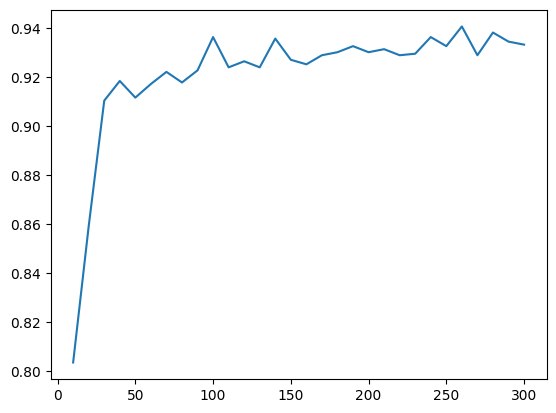

In [35]:
# Plot the graph Accuracy as a function of number of trees

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

print(np.mean(accuracy))
plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

- Question 8: Interpret the obtained plot.
- Question 9: Study the impact of the training size by analyzing the graph Accuracy as a function of number of trees.
- Question 10: conclude on the results obtained with DT and RF on the digit dataset and the iris dataset.